In [1]:
import os
import numpy as np
import pandas as pd
from scipy.stats import kstest,ttest_ind
import seaborn as sns
from matplotlib.ticker import MultipleLocator
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.sans-serif'] = "Arial" # missing fonts:: https://alexanderlabwhoi.github.io/post/2021-03-missingfont/
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams.update({'font.size': 14, 'axes.linewidth': 2, 'xtick.major.width': 1.5, 'xtick.major.size': 7, 'ytick.major.width': 1.5, 'ytick.major.size': 7})
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
def save_pdf(save_file, fig):
    pdf = PdfPages(save_file)
    pdf.savefig(fig, bbox_inches='tight')
    pdf.close()
    return

In [3]:
def read_efs_table(efs_table, group):
    efs_df = pd.read_csv(efs_table)
    efs_df["group"] = group
    return efs_df

In [4]:
root_dir = "/data5/deepro/ukbiobank/papers/bmi_project/4_characterization"
groups = ["white_british_male", "white_british_female", "pre_menopause", "post_menopause"]


efs_dfs = []

for group in groups:
    filename = os.path.join(root_dir, group, "data/effect_sizes/all.csv")
    efs_df_group = read_efs_table(filename, group)
    efs_dfs.append(efs_df_group)

In [5]:
efs_df = pd.concat(efs_dfs)

In [72]:
efs_df.loc[efs_df.group=="post_menopause"]

,Effect Size,Description,group
0,0.046461,Digenic combinations,post_menopause
1,0.042413,Digenic combinations,post_menopause
2,0.038165,Digenic combinations,post_menopause
3,0.034699,Digenic combinations,post_menopause
4,0.030976,Digenic combinations,post_menopause
5,0.030976,Digenic combinations,post_menopause
6,0.030976,Digenic combinations,post_menopause
7,0.050185,Trigenic combinations,post_menopause
8,0.050185,Trigenic combinations,post_menopause
9,0.050185,Trigenic combinations,post_menopause


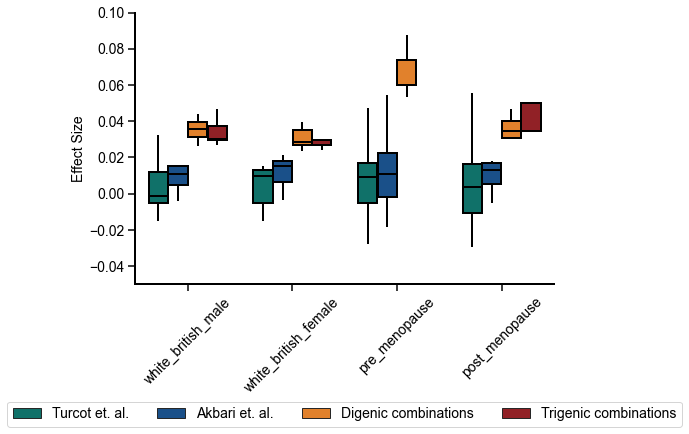

In [70]:
boxdf = efs_df

# Define Canvas
fig,ax = plt.subplots(1, 1, figsize=(7.5, 5))

pnts = np.linspace(0, np.pi * 2, 24)
circ = np.c_[np.sin(pnts) / 2, -np.cos(pnts) / 2]
vert = np.r_[circ, circ[::-1] * .7]

open_circle = matplotlib.path.Path(vert)

# Box Plot

# sns_strip = sns.stripplot(
#     data=boxdf,
#     palette=["#008176", "#08509b", "#ff7f0e", "#a30f15", ],  # '#D1245D', '#00ADEE', '#D1245D', '#00ADEE' "#0000a7"
#     x="group",
#     y="Effect Size",
#     hue="Description",
#     order=["white_british_male", "white_british_female", "pre_menopause", "post_menopause"],
#     hue_order=["Turcot et. al.", "Akbari et. al.", "Digenic combinations", "Trigenic combinations"],
#     orient="v",
#     s=7,
#     marker=open_circle,
#     alpha=0.75, ec='none', linewidth=0.1, facecolor=(0,0,0,0), dodge=True, ax=ax, jitter=0.2, 
#     )

sns_box = sns.boxplot(
    data=boxdf,
    x="group",
    y="Effect Size",
    hue="Description",
    palette=["#008176", "#08509b", "#ff7f0e", "#a30f15", ],
    hue_order=["Turcot et. al.", "Akbari et. al.", "Digenic combinations", "Trigenic combinations", ],
    orient="v",
    width=0.75,
    linewidth=2,
    fliersize=0, capprops={'color':'none'}, boxprops={'edgecolor':'k'}, whiskerprops={'color':'k'}, medianprops={'color':'k'},
    ax=ax
    )

# Adjust Axis
ax.set_yticks([-0.04, -0.02, 0, 0.02, 0.04, 0.06, 0.08, 0.1])
ax.set_ylim((-0.05, 0.1))
ax.set_xlabel("")

# Remove Spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
# ax.legend_.remove()
# legend below as multiple columns
h,l = ax.get_legend_handles_labels()
ax.legend_.remove()
ax.legend(h[:4],l[:4], loc="lower center", ncol=4, bbox_to_anchor=(0.5, -0.55))
# sns.despine(offset=0)
